# WEATHER FORCAST

In [1]:
# EDA packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import pickle

# DATA DESCRIPTION

In [2]:
# Load our data
df = pd.read_csv('seattle-weather.csv')
print(df.shape)
df.head(20)

(1461, 6)


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [3]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [4]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64


C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

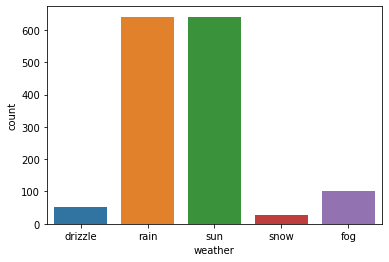

In [5]:
print(df['weather'].value_counts())
# df['weather'].value_counts().plot(kind='bar')
sns.countplot(df['weather'])

# REMOVING OUTLIER

<AxesSubplot:>

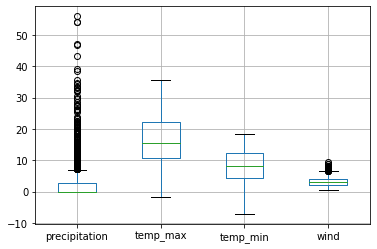

In [6]:
df.boxplot()


In [7]:

# IQR
Q1 = np.percentile(df['precipitation'], 25,interpolation = 'midpoint')

Q3 = np.percentile(df['precipitation'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['precipitation'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['precipitation'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

Old Shape:  (1461, 6)
New Shape:  (1255, 6)


C:\Users\Danish Kamal\AppData\Local\Temp\ipykernel_6844\1652203725.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['precipitation'], 25,interpolation = 'midpoint')
C:\Users\Danish Kamal\AppData\Local\Temp\ipykernel_6844\1652203725.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['precipitation'], 75,interpolation = 'midpoint')


<AxesSubplot:>

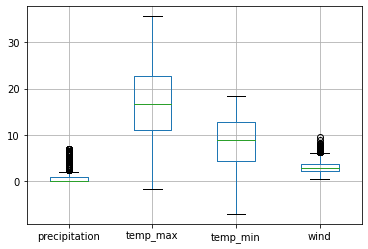

In [8]:
df.boxplot()


In [9]:
print(df['weather'].value_counts())

sun        640
rain       447
fog        101
drizzle     53
snow        14
Name: weather, dtype: int64


In [10]:
df['weather'].replace({'sun':0,'rain':1,'fog':2,'drizzle':3,'snow':4},inplace=True)
df['weather'].value_counts()

0    640
1    447
2    101
3     53
4     14
Name: weather, dtype: int64

In [11]:
X=df[['precipitation','temp_max','temp_min','wind']]
y=df['weather']

# MODEL TRAINING

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
# Naive Bayes Classifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [15]:
print('Accuracy on training data = ', training_data_accuracy*100)

Accuracy on training data =  82.73809523809523


In [16]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [17]:
print('Accuracy on test data = ', test_data_accuracy*100)

Accuracy on test data =  81.6867469879518


In [18]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
fit=clf.fit(X_train, y_train)

In [19]:
# accuracy on training data
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [20]:
print('Accuracy on training data = ', training_data_accuracy*100)
# print('f1 score',f1_score(y_train,training_data_accuracy, average='micro')*100)

Accuracy on training data =  83.57142857142857


In [21]:
# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [22]:
print('Accuracy on test data = ', test_data_accuracy*100)
print('f1 score',f1_score(y_test, X_test_prediction, pos_label='positive', average='micro')*100)

Accuracy on test data =  83.37349397590361
f1 score 83.37349397590361


C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# PREDICTING

In [23]:
def predict(input_data):
    # change the input data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the numpy array as we are predicting for one datapoint
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = model.predict(input_data_reshaped)
    print(prediction)

    if (prediction[0] == 0):
        print('sunny')
    
    elif (prediction[0] == 1): 
        print('rainy')
    
    elif (prediction[0] == 2):
        print('foggy')
    
    elif (prediction[0] == 3):
        print('drizzle')

    else:
        print('snow')


In [24]:
input_data = (5.3,1.1,-3.3,3.2)
predict(input_data)



[4]
snow


C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
clf=confusion_matrix(y_test, X_test_prediction)
clf

array([[197,   0,   0,   0,   0],
       [ 17, 147,   0,   0,   0],
       [ 34,   0,   0,   0,   0],
       [ 15,   0,   0,   0,   0],
       [  0,   3,   0,   0,   2]], dtype=int64)

# BETTER EVALUATION MATRIX

NOT THAT GOOD MODEL

<AxesSubplot:>

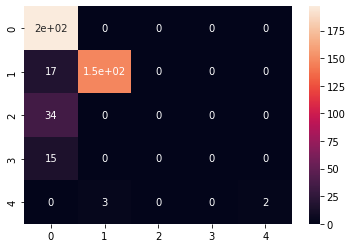

In [26]:
sns.heatmap(clf,annot=True)

# DOWNLOADING MODEL

In [27]:
pickle.dump(fit,open('weather-forcast.pkl','wb'))